In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [22]:
df = pd.read_csv('https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/organizations/organizations-1000.csv',  delimiter = ',')
df

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,E84A904909dF528,Liu-Hoover,http://www.day-hartman.org/,Western Sahara,Ergonomic zero administration knowledge user,1980,Online Publishing,6852
1,2,AAC4f9aBF86EAeF,Orr-Armstrong,https://www.chapman.net/,Algeria,Ergonomic radical budgetary management,1970,Import / Export,7994
2,3,ad2eb3C8C24DB87,Gill-Lamb,http://lin.com/,Cote d'Ivoire,Programmable intermediate conglomeration,2005,Apparel / Fashion,5105
3,4,D76BB12E5eE165B,Bauer-Weiss,https://gillespie-stout.com/,United States of America,Synergistic maximized definition,2015,Dairy,9069
4,5,2F31EddF2Db9aAE,Love-Palmer,https://kramer.com/,Denmark,Optimized optimizing moderator,2010,Management Consulting,6991
...,...,...,...,...,...,...,...,...,...
995,996,e5CEc38aa9A580b,Bullock Group,https://medina-bernard.com/,Turkmenistan,Public-key scalable conglomeration,1998,Wine / Spirits,6547
996,997,cEF9B4675E4bBd0,Mason Inc,https://franco-walls.com/,United States of America,Distributed exuding initiative,2015,Law Enforcement,9723
997,998,9abEb8aaFd25E04,Houston and Sons,http://mcgee.com/,Kenya,Stand-alone multi-state neural-net,1981,Civic / Social Organization,5355
998,999,de5Fc71DE825bFc,Olson-Solomon,https://koch.com/,Cocos (Keeling) Islands,Virtual responsive moderator,2013,Investment Banking / Venture,3825


In [24]:
# Список категориальных данных
cat_columns = []
# Список для числовых данных
num_columns = []

for column_name in df.columns:
    # Сортировка стобцов на необходимые категории
    if (df[column_name].dtypes == object):
        cat_columns += [column_name]
    else:
        num_columns += [column_name]

print('Числовые данные:\t ', num_columns, '\n Число столблцов = ', len(num_columns))

Категориальные данные:	  ['Organization Id', 'Name', 'Website', 'Country', 'Description', 'Industry'] 
 Число столблцов =  6
Числовые данные:	  ['Founded', 'Number of employees'] 
 Число столблцов =  2


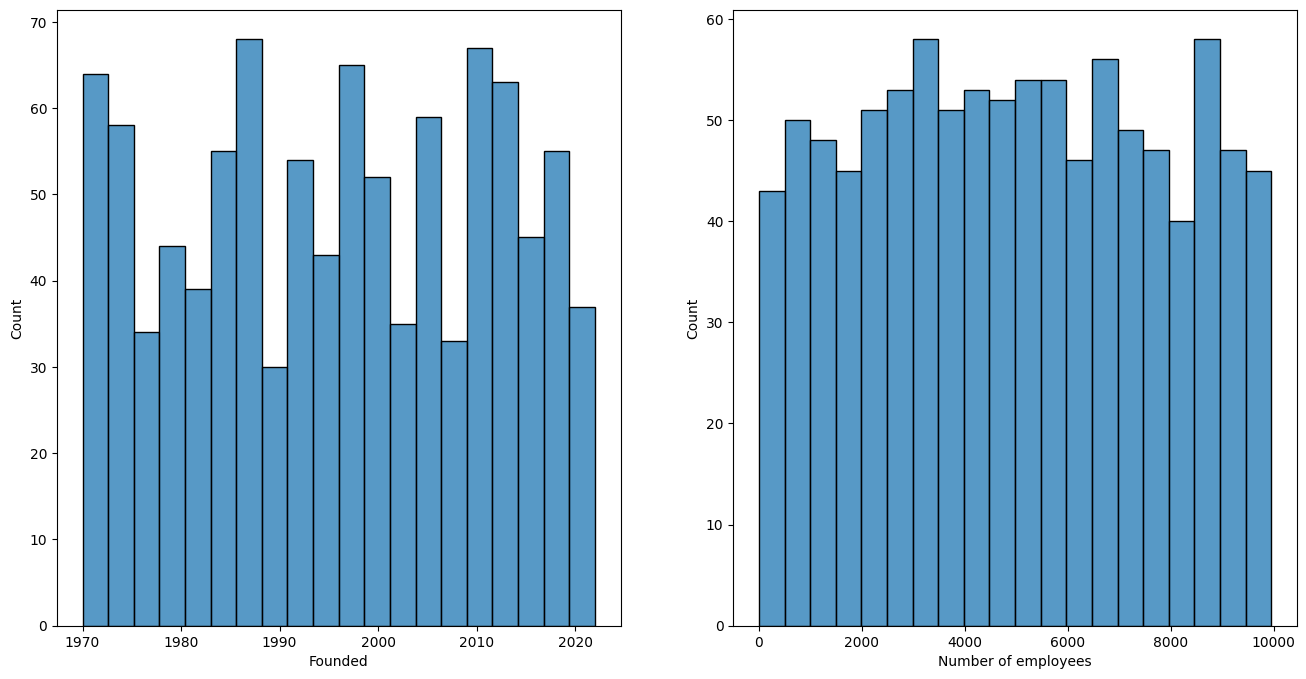

In [25]:
# Поле для создания графика
width = 2
height = int(np.ceil(len(num_columns) / width))
fig, ax = plt.subplots(nrows=height, ncols=width,
                       figsize=(16, 8))

# Отрисовываем по числовым данным
for idx, column_name in enumerate(num_columns):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data=df,
                 x=column_name,
                 bins=20)

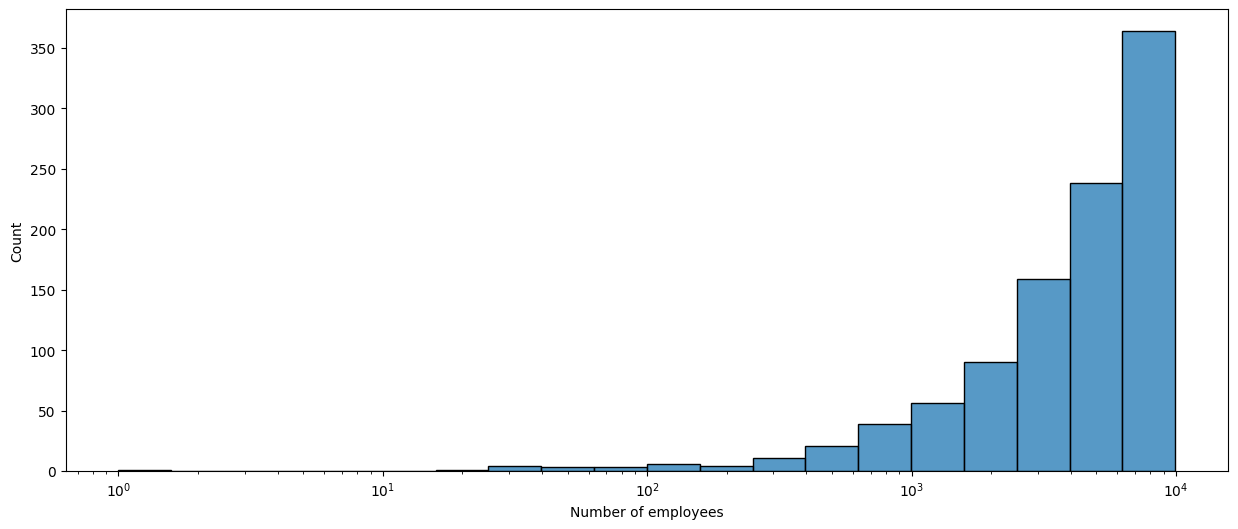

In [26]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,
             x='Number of employees',
             bins = 20,
             log_scale = True) # Измененный масштаб для бОльшего количества данных

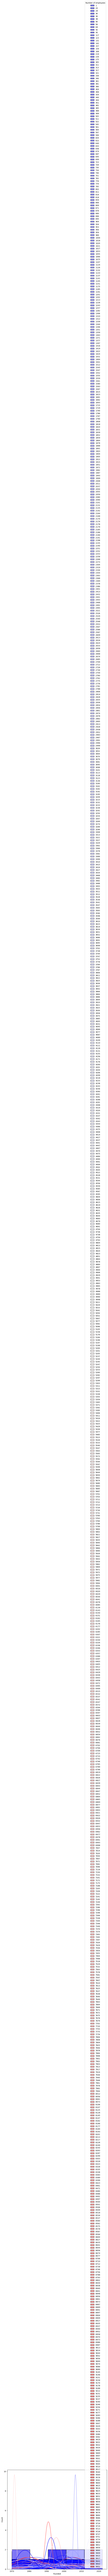

In [27]:
fig = plt.figure(figsize=(10,10))
sns.histplot(data = df,
             x = "Founded",
             hue ='Number of employees',
             bins = 5, kde = True,# Рекомендуется использовать Категориальные данные (не очень много уникальных значений)
             palette = 'bwr',);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                1000 non-null   int64 
 1   Organization Id      1000 non-null   object
 2   Name                 1000 non-null   object
 3   Website              1000 non-null   object
 4   Country              1000 non-null   object
 5   Description          1000 non-null   object
 6   Founded              1000 non-null   int64 
 7   Industry             1000 non-null   object
 8   Number of employees  1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [29]:
df.describe()

,Index,Founded,Number of employees
count,1000.000000,1000.000000,1000.000000
mean,500.500000,1995.852000,4964.996000
std,288.819436,15.096026,2812.789035
min,1.000000,1970.000000,1.000000
25%,250.750000,1983.000000,2612.000000
50%,500.500000,1996.000000,4941.000000
75%,750.250000,2009.000000,7348.250000
max,1000.000000,2022.000000,9952.000000


In [30]:
# Проверка на наличие дубликатов и возможное изменение размера.
df = df.drop_duplicates()
df.shape

(1000, 9)

In [31]:
# Находим строки с числом сотрудников менее чем у 1% компаний, что может быть полезно для удаления выбросов или аномальных значений в данных.
q = df['Number of employees'].quantile(0.99)
df[df['Number of employees'] < q]

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,E84A904909dF528,Liu-Hoover,http://www.day-hartman.org/,Western Sahara,Ergonomic zero administration knowledge user,1980,Online Publishing,6852
1,2,AAC4f9aBF86EAeF,Orr-Armstrong,https://www.chapman.net/,Algeria,Ergonomic radical budgetary management,1970,Import / Export,7994
2,3,ad2eb3C8C24DB87,Gill-Lamb,http://lin.com/,Cote d'Ivoire,Programmable intermediate conglomeration,2005,Apparel / Fashion,5105
3,4,D76BB12E5eE165B,Bauer-Weiss,https://gillespie-stout.com/,United States of America,Synergistic maximized definition,2015,Dairy,9069
4,5,2F31EddF2Db9aAE,Love-Palmer,https://kramer.com/,Denmark,Optimized optimizing moderator,2010,Management Consulting,6991
...,...,...,...,...,...,...,...,...,...
995,996,e5CEc38aa9A580b,Bullock Group,https://medina-bernard.com/,Turkmenistan,Public-key scalable conglomeration,1998,Wine / Spirits,6547
996,997,cEF9B4675E4bBd0,Mason Inc,https://franco-walls.com/,United States of America,Distributed exuding initiative,2015,Law Enforcement,9723
997,998,9abEb8aaFd25E04,Houston and Sons,http://mcgee.com/,Kenya,Stand-alone multi-state neural-net,1981,Civic / Social Organization,5355
998,999,de5Fc71DE825bFc,Olson-Solomon,https://koch.com/,Cocos (Keeling) Islands,Virtual responsive moderator,2013,Investment Banking / Venture,3825


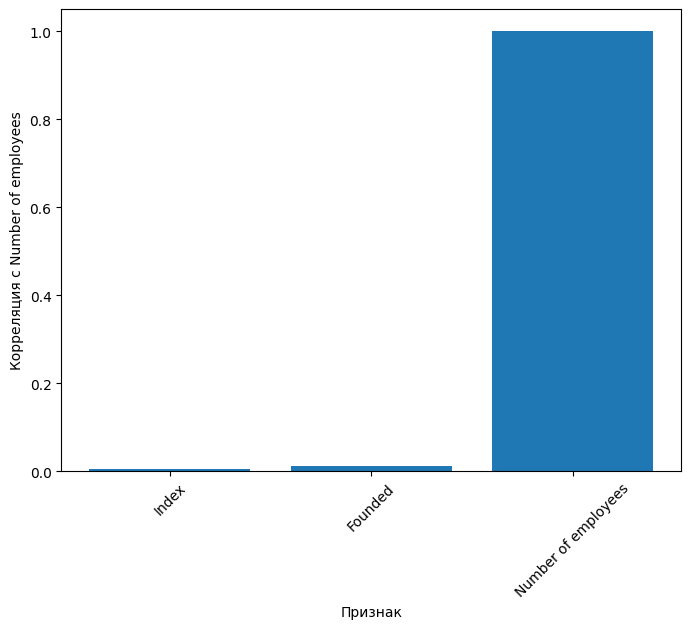

In [32]:
numeric_df = df.select_dtypes(include=['number'])

# Подсчет корреляций по количеству сотрудников
correlations = numeric_df.corrwith(df['Number of employees'])

# Create a heatmap for visualizing correlations
plt.figure(figsize=(8, 6))
plt.bar(correlations.index, correlations)
plt.xticks(rotation=45)
plt.xlabel('Признак')
plt.ylabel('Корреляция с Number of employees')
plt.show()


In [33]:
# Выделим числовые и категориальные признаки
numerical_features = ['Founded', 'Number of employees']
categorical_features = ['Organization Id', 'Name', 'Website', 'Country', 'Description', 'Industry']

# Стандартизация числовых признаков
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Нормализация числовых признаков (в диапазон от 0 до 1)
min_max_scaler = MinMaxScaler()
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

# Кодирование категориальных признаков с использованием one-hot encoding
df = pd.get_dummies(df, columns=categorical_features)

In [34]:
# Подготовка данных
X = df.drop('Number of employees', axis=1)  # Признаки
y = df['Number of employees']  # Целевая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор и обучение модели (например, линейная регрессия)
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 0.08901104203381087


In [35]:
X = df.drop('Number of employees', axis=1)
y = df['Number of employees']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на основе RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 0.08927713736492315


In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import OneHotEncoder


class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

def num_pipes(num_columns: list):

    result = []

    for num in num_columns:

        column_name = f'num_{num}'
        pipe = Pipeline([
            ('scaler', PowerTransformer())
        ])

        pre_result = (column_name, pipe, [num])
        result.append(pre_result)

    return result

def cat_pipes(cat_columns: list):

    result = []

    for cat in cat_columns:

        column_name = f'cat_{cat}'
        pipe = Pipeline([
            ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
        ])

        pre_result = (column_name, pipe, [cat])
        result.append(pre_result)

    return result[:-1]


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import SGDRegressor

X,y = df.drop(columns = ['Number of employees']), df['Number of employees']



X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=42)


preprocessors_num = ColumnTransformer(transformers=num_pipes(num_columns))
all_list = num_pipes(num_columns) + cat_pipes(cat_columns)

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=all_list)

pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=StandardScaler())
    )
])
nums = num_pipes(num_columns)

columns_num = np.hstack([nums[0][0],
                    nums[1][0]])

columns_num

array(['num_Founded', 'num_Number of employees'], dtype='<U23')

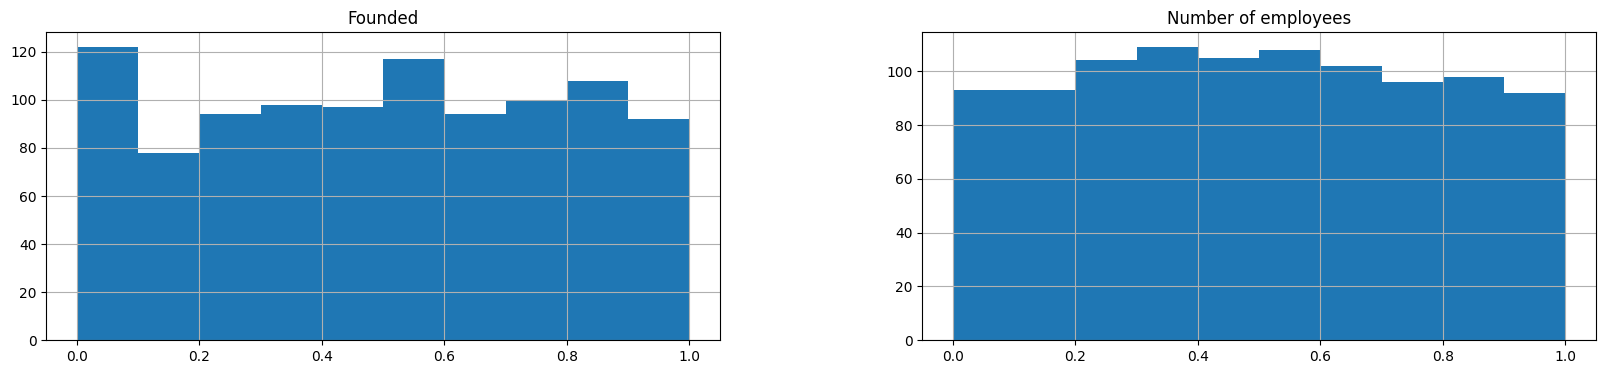

In [38]:
fig, axs = plt.subplots(1,2,figsize=(20,  4))

df.hist(column = num_columns, ax = axs );

In [39]:
scale = StandardScaler()

scale.fit(df[num_columns]);
scale.mean_, scale.scale_

(array([0.49715385, 0.49884394]), array([0.29016299, 0.28252259]))

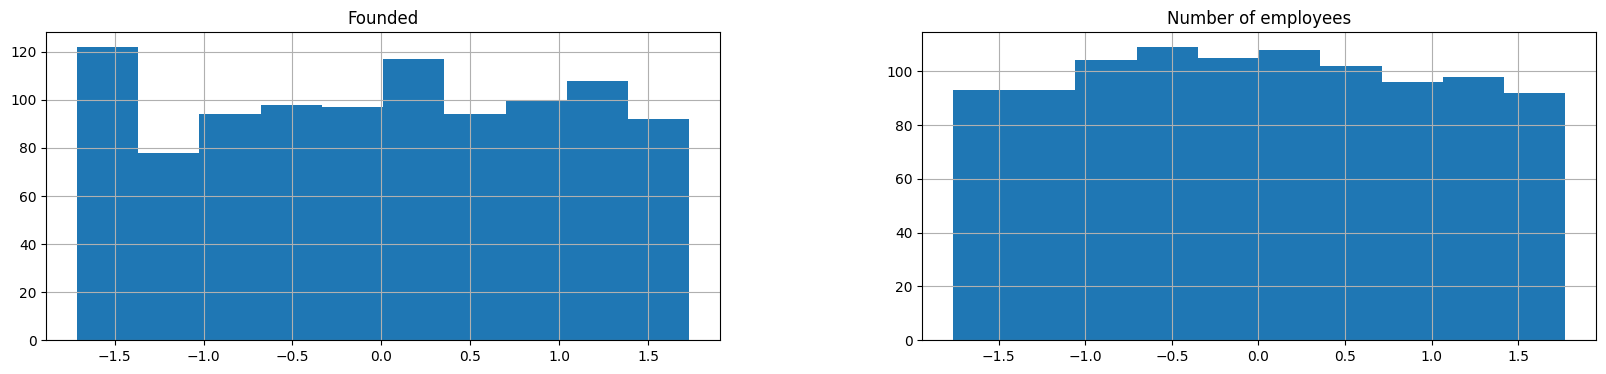

In [40]:
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard.hist(figsize = (20,4), layout= (1,2));

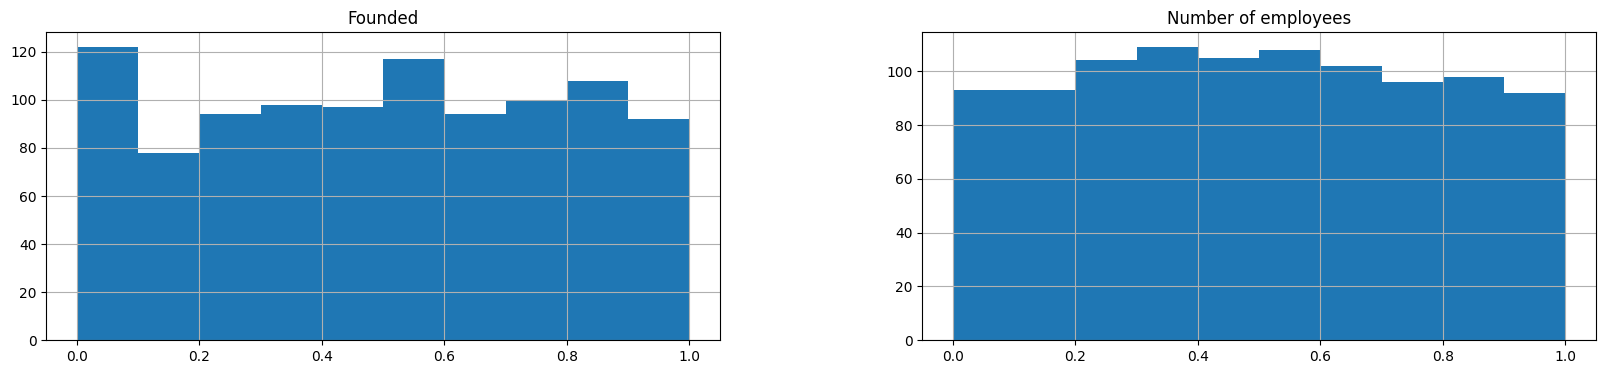

In [41]:
norm = MinMaxScaler()

norm.fit(df[num_columns]);
normolized = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normolized, columns= num_columns)
df_norm.hist(figsize = (20,4), layout= (1,2));


In [43]:
from sklearn.model_selection import train_test_split

In [36]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 228.6 kB/s eta 0:00:001m455.7 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 89.2 kB/s eta 0:00:00m eta 0:00:010:00:29m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 126.3 kB/s eta 0:00:00m eta 0:00:010:00:04


In [44]:
from sklearn.model_selection import StratifiedKFold


scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

cv_clf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

In [45]:
X = df.drop(columns = ["Founded", "Number of employees"])
y = df["Number of employees"]
features_names = list(df.drop(columns = ["Number of employees", "Founded"]).columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,Index,Organization Id_0052ABdaff57DaC,Organization Id_00B6a6Fdc035Ff3,Organization Id_02Fce43cb656920,Organization Id_02c7Ad4B6D0a2DE,Organization Id_039649AF41D4B93,Organization Id_040bdDAFC73CB32,Organization Id_0502B16c90e7072,Organization Id_05BbFBDA2aD8E1a,Organization Id_0600c95D0e0BaE2,...,Industry_Translation / Localization,Industry_Transportation,Industry_Utilities,Industry_Venture Capital / VC,Industry_Veterinary,Industry_Warehousing,Industry_Wholesale,Industry_Wine / Spirits,Industry_Wireless,Industry_Writing / Editing
541,542,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
440,441,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
482,483,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
422,423,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
778,779,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270,271,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,861,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
435,436,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
features_names

['Index',
 'Organization Id_0052ABdaff57DaC',
 'Organization Id_00B6a6Fdc035Ff3',
 'Organization Id_02Fce43cb656920',
 'Organization Id_02c7Ad4B6D0a2DE',
 'Organization Id_039649AF41D4B93',
 'Organization Id_040bdDAFC73CB32',
 'Organization Id_0502B16c90e7072',
 'Organization Id_05BbFBDA2aD8E1a',
 'Organization Id_0600c95D0e0BaE2',
 'Organization Id_062Fdfdc5aa37F9',
 'Organization Id_06Df66C7ec45CF9',
 'Organization Id_06fAe819ccE7D30',
 'Organization Id_073cF1eFaADA57a',
 'Organization Id_075c31B4C14022E',
 'Organization Id_081ABB2Bd2ebFD7',
 'Organization Id_083a6D31f06e9Ef',
 'Organization Id_089aec7Dc0e8E4e',
 'Organization Id_08BCcf6Da86fbA2',
 'Organization Id_0A2Ece7AE80f8A1',
 'Organization Id_0ADEd4af925C9ec',
 'Organization Id_0Aa03DE0F49f09d',
 'Organization Id_0Aab0BAaD1D0622',
 'Organization Id_0Ab00dcBEb6D7B1',
 'Organization Id_0B19F0056c68E6F',
 'Organization Id_0BE7686B0a6Ac5e',
 'Organization Id_0BcE557FEb98Bdc',
 'Organization Id_0D2d0dC2ddb267C',
 'Organization Id_

In [47]:
from catboost import Pool

train_data = Pool(
    data=X_train,
    label=y_train,
    cat_features = cat_columns[:-1],
    feature_names=features_names
)

eval_data = Pool(
    data=X_test,
    label=y_test,
    cat_features = cat_columns[:-1],
    feature_names=features_names
)

ValueError: 'Organization Id' is not in list